In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Extract Data from CSV file

In [ ]:
data = pd.read_csv('Salary_Data.xls')
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

: 

## Setting the dataset

In [52]:
x = data[['YearsExperience']]
y = data['Salary']

X, y_train = x.values, y.values
print(f"X_train.shape {X.shape}, y_train.shape {y_train.shape}")
print(X[:5], y_train[:5])

X_train.shape (30, 1), y_train.shape (30,)
[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]] [39343 46205 37731 43525 39891]


## Pre visualization of the current data


Text(0, 0.5, 'Salary')

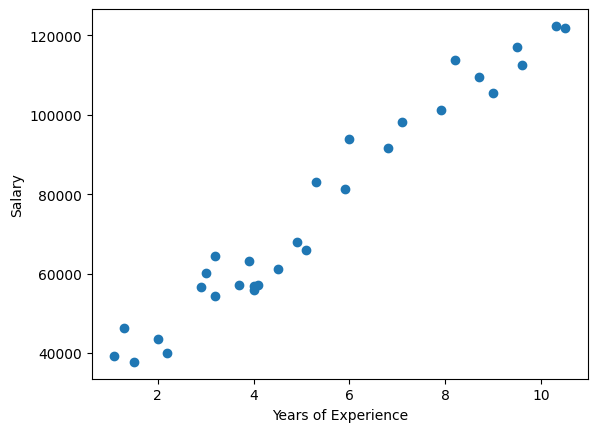

In [53]:
plt.scatter(X, y_train)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [ ]:
X_train = np.hstack((X, np.ones(X.shape)))
theta = np.random.randn(2, 1)
print(f"X_train.shape: {X_train.shape}")
print(f"Initial theta:\n{theta}")

X_train.shape: (30, 2)
Initial theta:
[[0.57454476]
 [0.52671852]]


: 

## Model

In [54]:
def model(X_train, theta):
    return X_train.dot(theta)

model_predictions = model(X_train, theta)
print(f"Model predictions (first 5):\n{model_predictions[:5]}")

Model predictions (first 5):
[[1.15871776]
 [1.27362671]
 [1.38853566]
 [1.67580804]
 [1.79071699]]


## Cost Function

In [56]:
def cost_function(X_train, y_train, theta):
    m = y_train.shape[0]
    predictions = model(X_train, theta)
    cost = (1/(2*m)) * np.sum((predictions.flatten() - y_train) ** 2)
    return cost

initial_cost = cost_function(X_train, y_train, theta)
print(f"Initial cost: {initial_cost}")

Initial cost: 3251163323.94967


## Gradient Descent

In [57]:
def derevative_cost_function(X_train, y_train, theta):
    m = y_train.shape[0]
    predictions = model(X_train, theta)
    errors = predictions.flatten() - y_train
    dtheta = (1/m) * X_train.T.dot(errors.reshape(-1, 1))
    return dtheta

def gradient_descent(X_train, y_train, theta, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        dtheta = derevative_cost_function(X_train, y_train, theta)
        theta -= learning_rate * dtheta
        cost = cost_function(X_train, y_train, theta)
        cost_history.append(cost)
    
    return theta, cost_history
